In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Template matching

In [10]:
# template matching
img = cv2.imread('test1.jpg', 0)
template = cv2.imread('test1_part.jpg', 0)
h, w = template.shape[:2]

In [11]:
img.shape

(300, 300)

In [12]:
template.shape

(150, 150)

In [21]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [14]:
res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)
res.shape

(151, 151)

In [15]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [16]:
min_val

32448.0

In [17]:
max_val

284980288.0

In [18]:
min_loc

(100, 100)

In [19]:
max_loc

(48, 136)

4


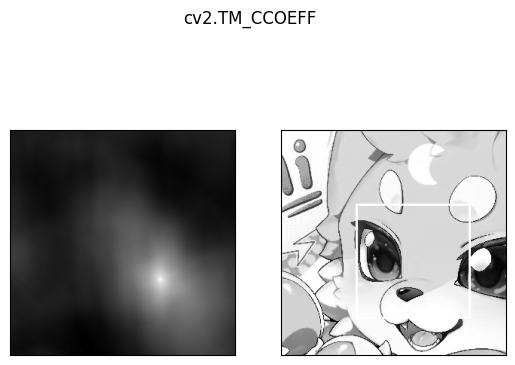

5


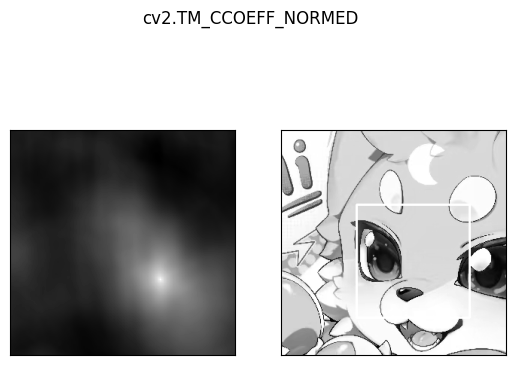

2


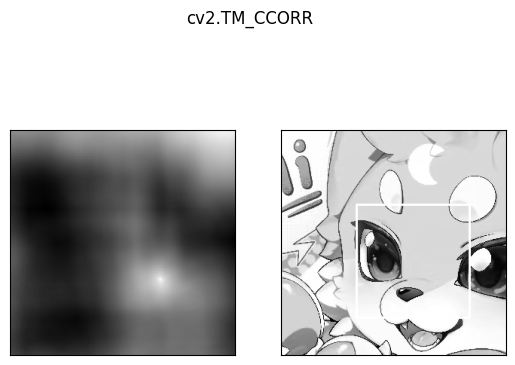

3


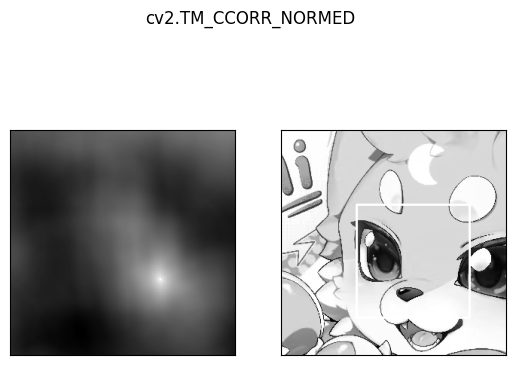

0


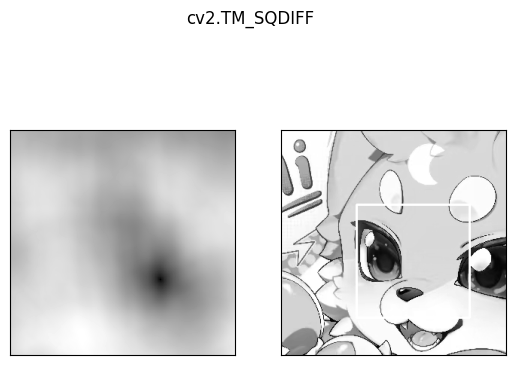

1


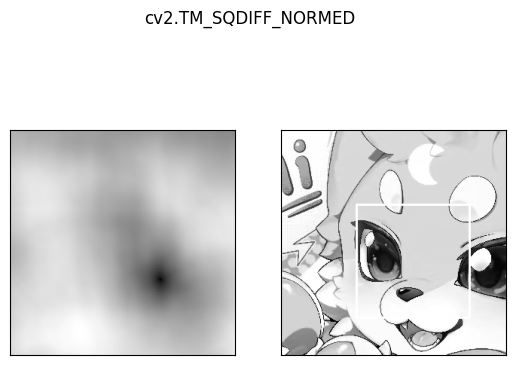

In [22]:
for m in methods:
    img2 = img.copy()
    
    # eval of method
    method = eval(m)
    print(method)
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # When TM_SQDIFF or TM_SQDIFF_NORMED, obtain the min value
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    # draw the rectangle
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)
    
    plt.subplot(121), plt.imshow(res, 'gray')
    plt.xticks([]), plt.yticks([]) # hide the coordinate axis
    plt.subplot(122), plt.imshow(img2, 'gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(m)
    plt.show()

# Match multiple objects

In [3]:
img_rgb = cv2.imread('apples.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('apple.png', 0)
h, w = template.shape[:2]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
# include coordinates which match at a rate bigger than 80%
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img_rgb, pt, bottom_right, (0, 0, 255), 2)
    
cv2.imshow('img_rgb', img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/srcres/.conda/envs/opencv-learn/lib/python3.12/site-packages/cv2/qt/plugins"
QObject::moveToThread: Current thread (0x25da42b0) is not the object's thread (0x25f6d4e0).
Cannot move to target thread (0x25da42b0)

Qt: Session management error: None of the authentication protocols specified are supported
QObject::moveToThread: Current thread (0x25da42b0) is not the object's thread (0x25f6d4e0).
Cannot move to target thread (0x25da42b0)

QObject::moveToThread: Current thread (0x25da42b0) is not the object's thread (0x25f6d4e0).
Cannot move to target thread (0x25da42b0)

QObject::moveToThread: Current thread (0x25da42b0) is not the object's thread (0x25f6d4e0).
Cannot move to target thread (0x25da42b0)

QObject::moveToThread: Current thread (0x25da42b0) is not the object's thread (0x25f6d4e0).
Cannot move to target thread (0x25da42b0)

QObject::moveToThread: Current thread (0x25da42b0) is not the object's thread (0x25f